In [1]:
import librosa
from matplotlib import pyplot as plt
import librosa.display

In [2]:
audio_path = 'D:\Lab Setup\speech-to-text\AudioFiles\welcome.mp3'
x, sr = librosa.load(audio_path, sr=None)
print(x.shape)
print(type(x), type(sr))
print(sr)

(96192,)
<class 'numpy.ndarray'> <class 'int'>
24000


**Displaying the spectrogram**

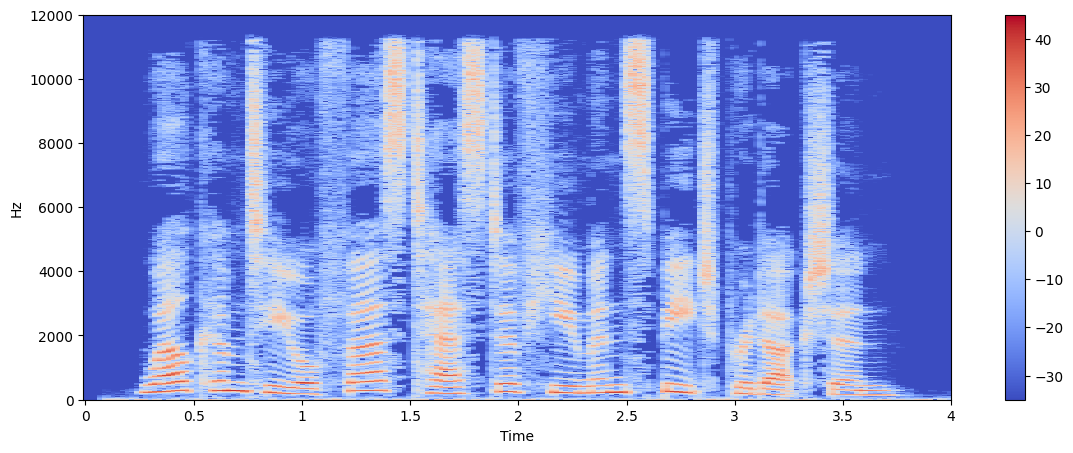

In [3]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()

**Understanding Zero Crossing rate**

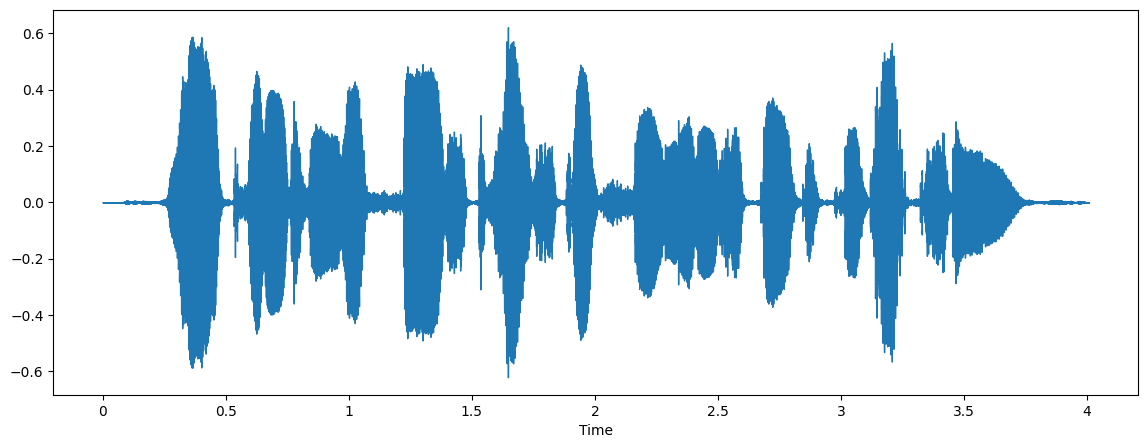

In [5]:
x, sr = librosa.load(audio_path)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
plt.show()

**Understanding Zooming in**

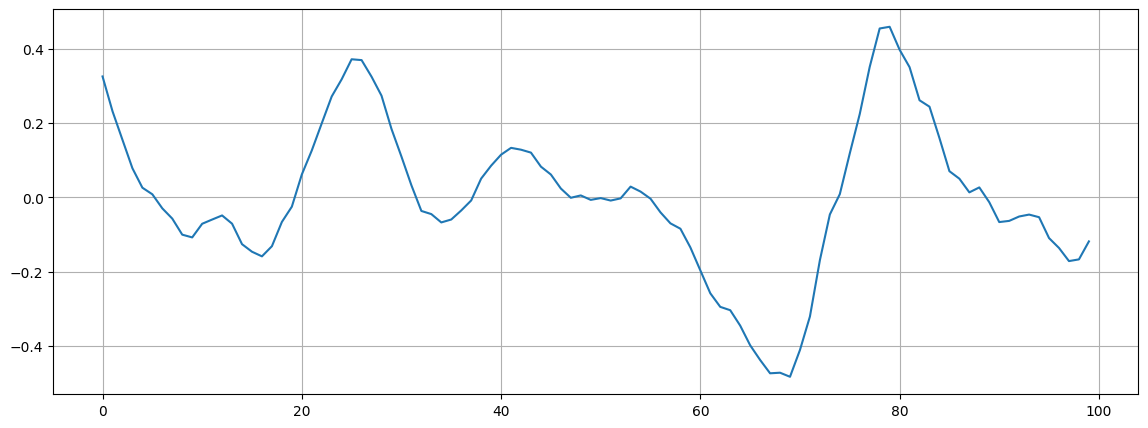

In [6]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

**Calculating zero crossings in the graph**

In [7]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

11


**Spectral Centroid: It indicates the location of the centre of Mass and it is calaculated as the weighted mean of the frequencies present in the sound. If the frequencies in the music are the same throughout, then spectral centroid would be around centre. And if there are high frequencies at the end of the sound, then the centroid would be towards its end.**

(173,)


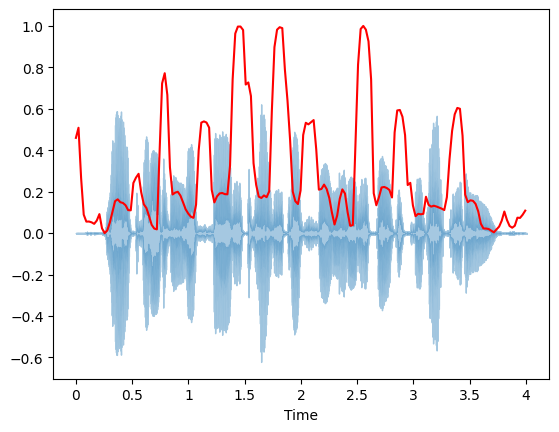

In [11]:
import sklearn
from sklearn import preprocessing

spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
print(spectral_centroids.shape)

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.show()

**spectral roll-off: It is the frequency below which a specified percentage of the total spectral energy lies**

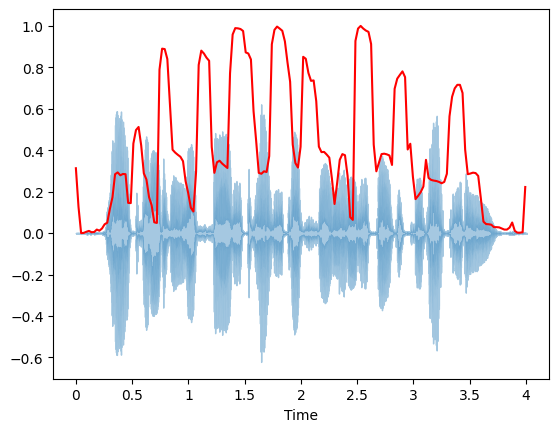

In [13]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sr)[0]
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

**Mel Frequency Cepstral Coefficient: It is one of the most important features used to extract information from audio. In order to calculate mfcc of a signal, we use mfcc() function**

(20, 173)


Text(0.5, 1.0, 'MFCC')

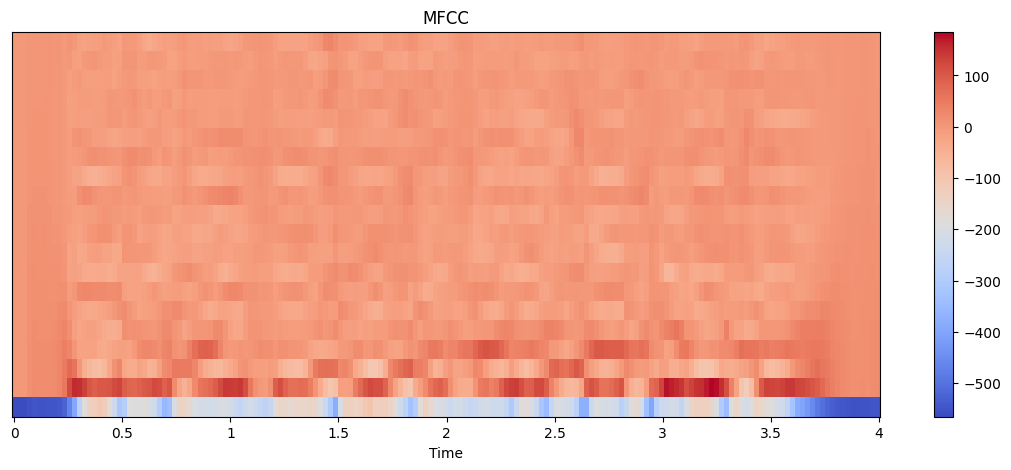

In [14]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')